In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [3]:
# Load your dataset
data = pd.read_csv('/content/medical_examination.csv')  # Replace with your actual file path

# Exploratory Data Analysis (EDA)
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None
                 id           age           sex        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349843

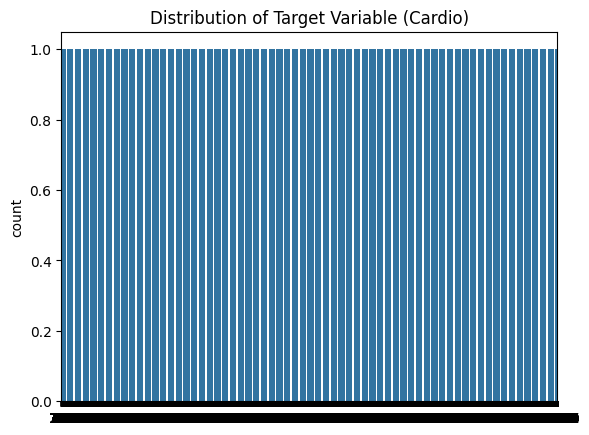

In [4]:
# Visualize the distribution of the target variable 'cardio'
sns.countplot(data['cardio'])
plt.title('Distribution of Target Variable (Cardio)')
plt.show()

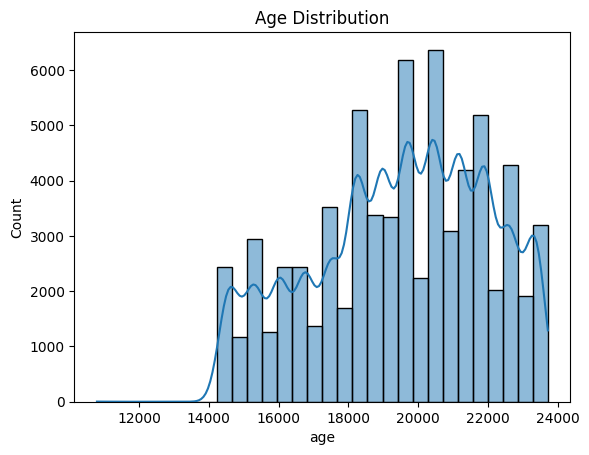

In [6]:
# Visualize age distribution
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

In [7]:
# Feature Engineering (if needed)
data['bmi'] = data['weight'] / (data['height'] / 100) ** 2

In [8]:
# Define features and target variable
X = data.drop(['id', 'cardio'], axis=1)  # Dropping 'id' and 'cardio' for feature set
y = data['cardio']  # 'cardio' is the target variable

In [9]:
# Data Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
# Dictionary to store models and their accuracy
model_accuracies = {}

In [12]:
# 1. Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
model_accuracies['Random Forest'] = accuracy_rf
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.71
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.72      0.71      6988
           1       0.72      0.70      0.71      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000



In [13]:
# 2. Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
model_accuracies['Logistic Regression'] = accuracy_lr
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.72
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      6988
           1       0.75      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



In [14]:
# 3. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
model_accuracies['K-Nearest Neighbors'] = accuracy_knn
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn:.2f}")
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))



K-Nearest Neighbors Accuracy: 0.65
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.66      0.65      6988
           1       0.65      0.63      0.64      7012

    accuracy                           0.65     14000
   macro avg       0.65      0.65      0.65     14000
weighted avg       0.65      0.65      0.65     14000



In [15]:
# 4. Support Vector Machine (SVM)
svc = SVC(probability=True)  # Enable probability for ROC curve
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
model_accuracies['Support Vector Machine'] = accuracy_svc
print(f"Support Vector Machine Accuracy: {accuracy_svc:.2f}")
print("Support Vector Machine Classification Report:")
print(classification_report(y_test, y_pred_svc))

Support Vector Machine Accuracy: 0.73
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      6988
           1       0.75      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



In [ ]:


# Print model accuracies for comparison
print("Model Accuracies:")
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy:.2f}")



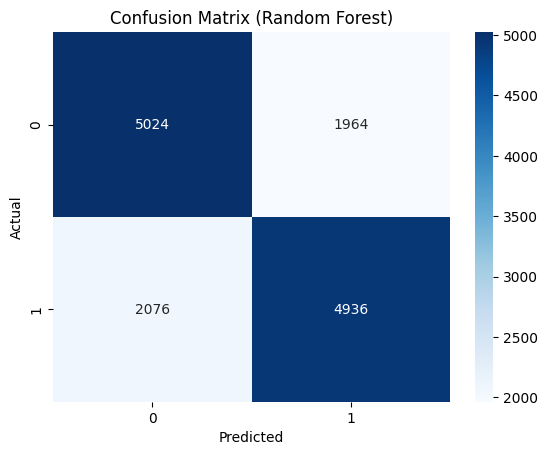

In [16]:
# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()



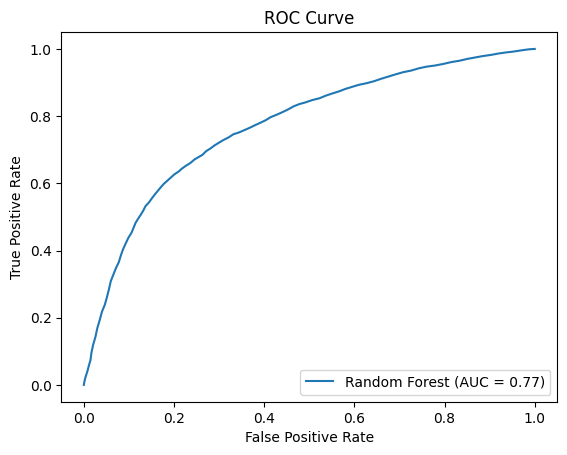

In [17]:
# ROC Curve and AUC Score for Random Forest
y_proba_rf = rf.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [18]:

# Hyperparameter Tuning for Random Forest (Optional)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best Cross-Validated Accuracy for Random Forest: {grid_search_rf.best_score_:.2f}")


Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validated Accuracy for Random Forest: 0.74


In [19]:
# Print the final summary of findings
print("\nFinal Summary:")
print(f"Best Model Based on Accuracy: {max(model_accuracies, key=model_accuracies.get)}")
for model, accuracy in model_accuracies.items():
    print(f"{model} Accuracy: {accuracy:.2f}")


Final Summary:
Best Model Based on Accuracy: Support Vector Machine
Random Forest Accuracy: 0.71
Logistic Regression Accuracy: 0.72
K-Nearest Neighbors Accuracy: 0.65
Support Vector Machine Accuracy: 0.73
